In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [254]:
dfs = []

for f in os.listdir('./datasets/ml-industry/task2'):
    if f.endswith('.csv') and 'processed' not in f and '(1)' not in f:
        dfs.append(pd.read_csv(f'./datasets/ml-industry/task2/{f}', index_col=0))

In [255]:
# concat all csv(s)
df_all = pd.concat(dfs, ignore_index=True)
# adjust the path
df_all['img_local_path'] = df_all['img_local_path'].apply(lambda x: x.replace('/content/drive/MyDrive/ITMO Master', '.'))
df_all.head(2)

,title,simple_desc,genre,year,votes,time,labels,rating,certificate,metascore,img_url,img_local_path
0,Andor,Prequel series to Star Wars' 'Rogue One'. In a...,Action,2022–,58203.0,40 min,"Action, Adventure, Drama",8.3,TV-14,NaN,https://m.media-amazon.com/images/M/MV5BNDgxNT...,./datasets/ml-industry/task2/images/Action/And...
1,House of the Dragon,An internal succession war within House Targar...,Action,2022–,259192.0,NaN,"Action, Adventure, Drama",8.5,TV-MA,NaN,https://m.media-amazon.com/images/M/MV5BZjBiOG...,./datasets/ml-industry/task2/images/Action/Hou...


In [256]:
# fix some unaligned genre
df_all['genre'] = df_all['genre'].apply(lambda x: 'Biography' if x == 'Biography2' else x)
df_all['img_local_path'] = df_all['img_local_path'].apply(lambda x: x.replace('Biography2', 'Biography'))
df_all[df_all['genre'] == 'Biography'].head(2)

,title,simple_desc,genre,year,votes,time,labels,rating,certificate,metascore,img_url,img_local_path
1641,The Crown,Follows the political rivalries and romance of...,Biography,2016–,212513.0,58 min,"Biography, Drama, History",8.7,TV-MA,NaN,https://m.media-amazon.com/images/M/MV5BZTEyNj...,./datasets/ml-industry/task2/images/Biography/...
1642,Dahmer - Monster: The Jeffrey Dahmer Story,Story of the Milwaukee Monster told from the p...,Biography,2022,111738.0,534 min,"Biography, Crime, Drama",8.0,TV-MA,NaN,https://m.media-amazon.com/images/M/MV5BM2IwNW...,./datasets/ml-industry/task2/images/Biography/...


In [258]:
count = df_all.groupby(['genre'], as_index=False).title.count()
fig = px.bar(count, x='genre', y='title', title='Data distribution over all genre')
fig.show()

In [259]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12656 entries, 0 to 12655
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           12656 non-null  object 
 1   simple_desc     12656 non-null  object 
 2   genre           12656 non-null  object 
 3   year            12563 non-null  object 
 4   votes           12225 non-null  float64
 5   time            11095 non-null  object 
 6   labels          12656 non-null  object 
 7   rating          12225 non-null  float64
 8   certificate     9878 non-null   object 
 9   metascore       13 non-null     float64
 10  img_url         12656 non-null  object 
 11  img_local_path  12656 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.2+ MB


A lot of columns were contains missing values. But fortunately, all mandatory columns `title`, `simple_desc`, `img_local_path`, and `genre` are doesn't have missing value.

In [260]:
df_analysis = df_all.copy(deep=True)

df_analysis['title_char_len'] = df_analysis['title'].str.len()
df_analysis['simple_desc_char_len'] = df_analysis['simple_desc'].str.len()
df_analysis['title_word_len'] = df_analysis['title'].apply(lambda x: len(x.split()))
df_analysis['simple_desc_word_len'] = df_analysis['simple_desc'].apply(lambda x: len(x.split()))
df_analysis.head(2)

,title,simple_desc,genre,year,votes,time,labels,rating,certificate,metascore,img_url,img_local_path,title_char_len,simple_desc_char_len,title_word_len,simple_desc_word_len
0,Andor,Prequel series to Star Wars' 'Rogue One'. In a...,Action,2022–,58203.0,40 min,"Action, Adventure, Drama",8.3,TV-14,NaN,https://m.media-amazon.com/images/M/MV5BNDgxNT...,./datasets/ml-industry/task2/images/Action/And...,5,175,1,32
1,House of the Dragon,An internal succession war within House Targar...,Action,2022–,259192.0,NaN,"Action, Adventure, Drama",8.5,TV-MA,NaN,https://m.media-amazon.com/images/M/MV5BZjBiOG...,./datasets/ml-industry/task2/images/Action/Hou...,19,127,4,21


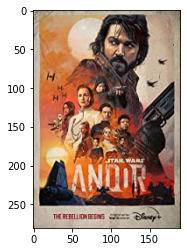

In [261]:
from PIL import Image
import numpy as np
plt.imshow(np.array(Image.open(df_all.head().img_local_path[0])))

In [262]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).title_char_len.mean(), 
    x='genre', 
    y='title_char_len', 
    title='Title char length distribution'
)
fig.show()

In [264]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).simple_desc_char_len.mean(), 
    x='genre', 
    y='simple_desc_char_len', 
    title='Description char length distribution'
)
fig.show()

In [265]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).title_word_len.mean(), 
    x='genre', 
    y='title_word_len', 
    title='Title word length distribution'
)
fig.show()

In [266]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).simple_desc_word_len.mean(), 
    x='genre', 
    y='simple_desc_word_len', 
    title='Description word length distribution'
)
fig.show()

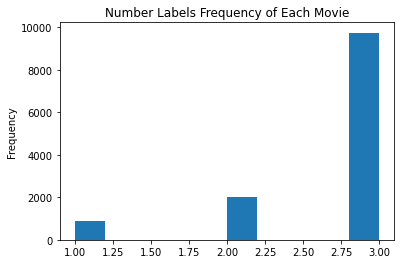

In [267]:
# here we got 1 to 4 labels frequency of each movie as we injected genre to our label
df_analysis['labels_count'] = df_analysis.labels.apply(lambda x: len(set(x.split(', '))))   # wrap split result with set to make sure no duplicate labels
df_analysis['labels_count'].plot.hist()
plt.title('Number Labels Frequency of Each Movie')
plt.show()

In [268]:
# make multilabel
onehot_labels = pd.get_dummies(df_all.genre)
df_multilabel = df_all.copy(deep=True)
df_multilabel.loc[:, onehot_labels.columns] = onehot_labels
df_multilabel.head(2)

,title,simple_desc,genre,year,votes,time,labels,rating,certificate,metascore,...,Musical,Mystery,Romance,Sci-Fi,Short Film,Sport,Superhero,Thriller,War,Western
0,Andor,Prequel series to Star Wars' 'Rogue One'. In a...,Action,2022–,58203.0,40 min,"Action, Adventure, Drama",8.3,TV-14,NaN,...,0,0,0,0,0,0,0,0,0,0
1,House of the Dragon,An internal succession war within House Targar...,Action,2022–,259192.0,NaN,"Action, Adventure, Drama",8.5,TV-MA,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# distribute labels
for c in onehot_labels.columns:
    df_multilabel[c] = df_multilabel['labels'].apply(lambda labels: 1 if c in labels else 0)

In [208]:
# df_all = df_all[['title', 'simple_desc', 'genre', 'img_local_path']]
df_all = df_all.drop(['year', 'votes', 'time', 'rating', 'labels', 'certificate', 'metascore', 'img_url'], axis=1)
df_all.to_csv('./datasets/ml-industry/task2/processed-multilabel.csv', header=True, index=False)